**Описание проекта**

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

Тариф «Смарт»

Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей


Тариф «Ультра»

Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

Описание данных

Таблица users (информация о пользователях):

  * user_id — уникальный идентификатор пользователя
  * first_name — имя пользователя
  * last_name — фамилия пользователя
  * age — возраст пользователя (годы)
  * reg_date — дата подключения тарифа (день, месяц, год)
  * churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
  * city — город проживания пользователя
  * tariff — название тарифного плана

Таблица calls (информация о звонках):

  * id — уникальный номер звонка
  * call_date — дата звонка
  * duration — длительность звонка в минутах
  * user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):

  * id — уникальный номер сообщения
  * message_date — дата сообщения
  * user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

  * id — уникальный номер сессии
  * mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
  * session_date — дата интернет-сессии
  * user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):

  * tariff_name — название тарифа
  * rub_monthly_fee — ежемесячная абонентская плата в рублях
  * minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
  * messages_included — количество сообщений в месяц, включённых в абонентскую плату
  * mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
  * rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
  * rub_per_message — стоимость отправки сообщения сверх тарифного пакета
  * rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Загрузим датасет и библиотеки

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_calls = pd.read_csv('/datasets/calls.csv', decimal = ',')
df_internet = pd.read_csv('/datasets/internet.csv', decimal = ',')
df_messages = pd.read_csv('/datasets/messages.csv', decimal = ',')
df_tariffs = pd.read_csv('/datasets/tariffs.csv', decimal = ',')
df_users = pd.read_csv('/datasets/users.csv', decimal = ',')

## Приведем данные к нужным типам.
Для этого воспользуюсь методомом info, он позволяет узнать тип данных в столбцах и количество заполненных строк в каждом из них. Сравнивая это значение с числом под таблицей можно понять есть ли пропуски. Замену типов данных буду производить только в тех столбцах, над которыми планирую производить математические операции, такие как сложение или сравнение. В эту категорию не попадают идентификаторы клиентов и операций.

In [ ]:
df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.8,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [ ]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null object
user_id      202607 non-null int64
dtypes: int64(1), object(3)
memory usage: 6.2+ MB


In [ ]:
df_calls['duration'] = pd.to_numeric(df_calls.duration)
df_calls['call_date'] = pd.to_datetime(df_calls.call_date, format = '%Y-%m-%d')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [ ]:
print('количество звонков с отрицательной продолжительностью: ', df_calls[df_calls.duration == '-%'].shape[0])
# проверка на наличие ошибок.

количество звонков с отрицательной продолжительностью:  0


/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [ ]:
# для укругления в большую сторону удобно испльзовать метод ceil()
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


In [ ]:
df_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.9,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.0,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [ ]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null object
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: int64(2), object(3)
memory usage: 5.7+ MB


In [ ]:
df_internet['mb_used'] = pd.to_numeric(df_internet.mb_used)
df_internet['session_date'] = pd.to_datetime(df_internet.session_date, format = '%Y-%m-%d')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [ ]:
df_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [ ]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [ ]:
df_messages['message_date'] = pd.to_datetime(df_messages.message_date, format = '%Y-%m-%d')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [ ]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [ ]:
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
df_users['reg_date'] = pd.to_datetime(df_users.reg_date, format = '%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users.churn_date, format = '%Y-%m-%d')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


по ошибкам - в данных нашла записи с 0 использованных мб интернета. Исправлять не стала, так как возможна ситуация, аналогичная звонкам, когда какие-то действия (например поиск сети) могут быть связаны с интернетом, но затрат трафика нет. 

## расчет израсходованных ресурсов на пользователя

In [ ]:
# создание дополнительного идентификатора, для группировки
# Беру только месяц из дат, так как во всем датасете только 2018 год

df_calls['user_month'] = df_calls.user_id.astype(str) + pd.DatetimeIndex(df_calls.call_date).month.astype(str)
df_internet['user_month'] = df_internet.user_id.astype(str) + pd.DatetimeIndex(df_internet.session_date).month.astype(str)
df_messages['user_month'] = df_messages.user_id.astype(str) + pd.DatetimeIndex(df_messages.message_date).month.astype(str)

In [ ]:
# создаю колонки для отслеживания активации продукта

df_users['reg_mon'] = pd.DatetimeIndex(df_users.reg_date).month
df_users['end_mon'] = pd.DatetimeIndex(df_users.churn_date).month
df_users['end_mon'] = df_users['end_mon'].fillna(12)

In [ ]:
# так как таблицы имеют не полное количество комбинаций месяц-пользователь (500*12=6000), 
# создаю таблицу со всеми возможными ключами

table_was_used = []
t = []

for user_id in df_users['user_id']:
    for mon in range(1, 13): 
        t = user_id, mon, str(user_id)+ str(mon)
        table_was_used.append(t)
        
table_was_used = pd.DataFrame(table_was_used, columns=['user_id', 'month', 'user_month'])

In [ ]:
print('количество звонков с отрицательной продолжительностью: ', df_internet[df_internet.mb_used == '-%'].shape[0])
# проверка на наличие ошибок.

количество звонков с отрицательной продолжительностью:  0


In [ ]:
# # для укругления в большую сторону удобно испльзовать метод ceil()
# df_internet['mb_used'] = np.ceil(df_internet['mb_used']/1024)
# df_internet.head(5)

In [ ]:
# исправления V2

df_internet_gb = df_internet.groupby('user_month').agg({'mb_used':['sum']})
df_internet_gb.columns=['gb_used']
df_internet_gb['gb_used'] = np.ceil(df_internet_gb['gb_used']/1024)

# так же заменила df_internet на df_internet_gb при создании таблицы table_was_used

In [ ]:
# создание дополительного столбца для расчета количества звонков
df_calls['duration2'] = df_calls['duration'].copy()

In [ ]:
# Подтягиваю необходимую информацию из остальных таблиц, заменяю пропуски на 0

table_was_used = table_was_used\
    .merge(df_users[['user_id', 'tariff', 'reg_mon', 'end_mon', 'city']], on = 'user_id', how = 'left')

table_was_used = table_was_used\
    .merge(df_calls.groupby('user_month').agg({'duration':['sum'], 'duration2':['count']}), on = 'user_month', how = 'left')

table_was_used = table_was_used\
    .merge(df_internet.groupby('user_month').agg({'mb_used':['sum']}), on = 'user_month', how = 'left')

table_was_used = table_was_used\
    .merge(df_messages.groupby('user_month')['id'].count(), on = 'user_month', how = 'left')

table_was_used.columns = ['user_id', 'month', 'user_month', 'tariff', 'reg_mon', 'end_mon', 'city', 'calls', 'calls_cnt', 'internet', 'messages']

table_was_used = table_was_used.fillna(0)

table_was_used = table_was_used\
    .merge(df_tariffs, left_on = 'tariff', right_on = 'tariff_name', how = 'left')

table_was_used = table_was_used[table_was_used['month'] >= table_was_used['reg_mon']]
table_was_used = table_was_used[table_was_used['month'] <= table_was_used['end_mon']]

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [ ]:
# расчет выручки с каждого пользователя

table_was_used['add_calss'] = table_was_used['calls'] - table_was_used['minutes_included']
table_was_used.loc[(table_was_used.add_calss < 0), 'add_calss'] = 0

table_was_used['add_internet'] = table_was_used['internet'] - table_was_used['mb_per_month_included']
table_was_used.loc[(table_was_used.add_internet < 0), 'add_internet'] = 0

table_was_used['add_messages'] = table_was_used['messages'] - table_was_used['messages_included']
table_was_used.loc[(table_was_used.add_messages < 0), 'add_messages'] = 0

table_was_used['pay'] = table_was_used['rub_monthly_fee'] + table_was_used['add_calss']*table_was_used['rub_per_minute'] + table_was_used['add_internet']*table_was_used['rub_per_gb'] + table_was_used['add_messages']*table_was_used['rub_per_message']

In [ ]:
table_was_used[['user_id', 'month', 'tariff', 'pay']]

,user_id,month,tariff,pay
4,1000,5,ultra,1950.0
5,1000,6,ultra,1950.0
6,1000,7,ultra,1950.0
7,1000,8,ultra,1950.0
8,1000,9,ultra,1950.0
...,...,...,...,...
5985,1498,10,smart,1044422.0
5996,1499,9,smart,550.0
5997,1499,10,smart,486252.0
5998,1499,11,smart,521575.0


<div class="alert alert-block alert-info">
исходя из рачетов, можно понять, что оба тарифа приносят значительный доход компании, однако доход от тарифа ультра все же больше, благодаря его стоимости. Общий доход компании состовляет 3 466 201 руб. от данных услуг.
</div>

In [ ]:
print('заработок по тарифам и колличество клиентов')
print(table_was_used.groupby('tariff').agg({'pay':['sum'], 'user_id':['count']}))

заработок по тарифам и колличество клиентов
                 pay user_id
                 sum   count
tariff                      
smart   1.230041e+09    2230
ultra   1.127409e+08     986


## Проанализируйте данные
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [ ]:
table_was_used['tariff_month'] = table_was_used['tariff'].astype(str) + table_was_used['month'].astype(str)

In [ ]:
table_was_used_tariff = []
t = []

for tariff in df_tariffs['tariff_name']:
    for mon in range(1, 13): 
        t = tariff, mon, str(tariff)+ str(mon)
        table_was_used_tariff.append(t)
        
table_was_used_tariff = pd.DataFrame(table_was_used_tariff, columns=['tariff', 'month', 'tariff_month'])

In [ ]:
# Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

table_was_used_tariff_sum = table_was_used_tariff\
    .merge(table_was_used.groupby('tariff_month').agg({'calls':['sum'], 'internet':['sum'], 'messages':['sum']}), on = 'tariff_month', how = 'left')
table_was_used_tariff_sum.columns = ['tariff', 'month', 'tariff_month', 'calls_sum', 'internet_sum', 'messages_sum']
table_was_used_tariff_sum

,tariff,month,tariff_month,calls_sum,internet_sum,messages_sum
0,smart,1,smart1,6931.0,289466.40,620.0
1,smart,2,smart2,17324.0,672629.15,1397.0
2,smart,3,smart3,30034.0,1163020.25,2453.0
3,smart,4,smart4,41119.0,1507764.23,3443.0
4,smart,5,smart5,54618.0,2228530.99,4762.0
5,smart,6,smart6,64885.0,2590322.27,5478.0
6,smart,7,smart7,82079.0,3164373.22,6784.0
7,smart,8,smart8,99045.0,3903519.22,7905.0
8,smart,9,smart9,111439.0,4238930.49,8746.0
9,smart,10,smart10,125284.0,4926594.13,9927.0


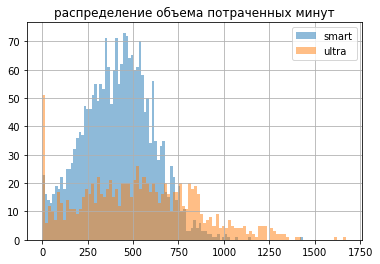

In [ ]:
t_calls = table_was_used[['tariff', 'calls']]
t_calls[t_calls['tariff'] == 'smart']['calls'].hist(bins=100, alpha=0.5, label='smart')
t_calls[t_calls['tariff'] == 'ultra']['calls'].hist(bins=100, alpha=0.5, label='ultra')
plt.title("распределение объема потраченных минут")
plt.legend()

<div class="alert alert-block alert-info">
пик клиентов тарифа смарт по колличеству звонков находится левее, относительно пика клиентов тарифа ультра, 
что соответствует идеологии тарифного плана. Однако можно заметить, что практически половина клиентов тарифа смарт расходуют 
выделенные минуты и докупают дополнительные. А клиенты тарифа ультра во всех случаях расходуют менее выделенного тарифом объема, 
причем около 90% не используют более 1000 минут. Разница в высоте гистограмм объясняется разной подошевой распределения и
количеством клиентов.
</div>

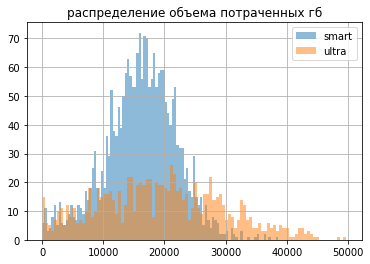

In [ ]:
t_internet = table_was_used[['tariff', 'internet']]
t_internet[t_internet['tariff'] == 'smart']['internet'].hist(bins=100, alpha=0.5, label='smart')
t_internet[t_internet['tariff'] == 'ultra']['internet'].hist(bins=100, alpha=0.5, label='ultra')
plt.title("распределение объема потраченных гб")
plt.legend()

<div class="alert alert-block alert-info">
пик клиентов тарифа смарт по колличеству звонков находится слегка правее, относительно пика клиентов тарифа ультра, 
что не соответствует идеологии тарифного плана. Клиенты обоих тарифов склонны значительно выходить за рамки выделенного трафика. 
Разница в высоте гистограмм объясняется разным количеством клиентов. Интересно, что в этом случае подошева распределения 
тарифов имеет схожий размер.
  </div>

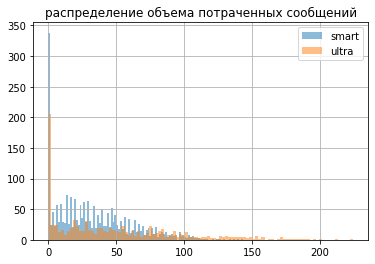

In [ ]:
t_messages = table_was_used[['tariff', 'messages']]
t_messages[t_messages['tariff'] == 'smart']['messages'].hist(bins=100, alpha=0.5, label='smart')
t_messages[t_messages['tariff'] == 'ultra']['messages'].hist(bins=100, alpha=0.5, label='ultra')
plt.title("распределение объема потраченных сообщений")
plt.legend()

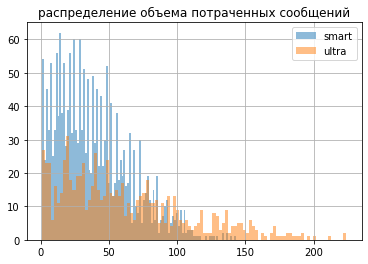

In [ ]:
# изз-за пика в 0 трудно разобрать остальную картинку, попробую его убрать

t_messages = t_messages[t_messages.messages > 0]
t_messages[t_messages['tariff'] == 'smart']['messages'].hist(bins=100, alpha=0.5, label='smart')
t_messages[t_messages['tariff'] == 'ultra']['messages'].hist(bins=100, alpha=0.5, label='ultra')
plt.title("распределение объема потраченных сообщений")
plt.legend()

<div class="alert alert-block alert-info">
Оба пика распределений оказались в нуле, что свидетельствует о непопулярности смс сообщений. Клиенты тарифа смарт склонны  выходить за рамки. В то время, как клиенты ультры не расхудуют всего объема (не более 230 из 1000).
Разница в высоте гистограмм практически отсутствует. Эти распределения меньше всего похожи на нормальные и смещены к нулю.
</div>

In [ ]:
print(table_was_used.groupby('tariff').agg({'calls': ['mean','var','std']}))
print(table_was_used.groupby('tariff').agg({'internet': ['mean','var','std']}))
print(table_was_used.groupby('tariff').agg({'messages': ['mean','var','std']}))

             calls                           
              mean            var         std
tariff                                       
smart   417.747534   36281.393836  190.476754
ultra   526.089249  101052.493549  317.887549
            internet                            
                mean           var           std
tariff                                          
smart   16201.118655  3.456484e+07   5879.187315
ultra   19449.059970  1.020321e+08  10101.095459
         messages                        
             mean          var        std
tariff                                   
smart   33.369058   796.955256  28.230396
ultra   49.313387  2285.417425  47.806040


Средние значения тарифа смарт наже средних тарифа ультра, что вполне логично. Интересно, что средние значения по тарифу ультра не далеко уходят от лимотов тарифа смарт, а значит многим пользователям чтоит рассмотреть смену тарифа, для экономии средств. Среднее значение использованного интренета пользователями немного выше, влюченого в пакет, лимита. 
Диапазон расброса значений, согласно дисперсии и стандартному отклонению по всем услугам в тарифе ильтра значительно больше, чем в тарифе смарт. Интересно, что если сложить среднее значение и стандартное отклонения, то значения по всем услугам для тарифа смарт будут выше включенного лимита, а для тарифа ультра ниже. Вывод: пользователям было бы удобнее иметь нечто среднее между двумя тарифами, что не выгодно для компании.


## Проверьте гипотезы

средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Гипотезы буду выстраивать исходя от знака "=", который обычно применяется в нулевой гипотизе.

In [ ]:
# Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна
# Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

from scipy import stats as st
sample_ultra = table_was_used[table_was_used['tariff'] == 'ultra']['pay']
sample_smart = table_was_used[table_was_used['tariff'] == 'smart']['pay']
results = st.ttest_ind(sample_ultra, sample_smart, equal_var = False)

print('p-значение: ', results.pvalue)
if results.pvalue < 0.05:
    print("Отвергаем нулевую гипотезу 'средняя выручка пользователей тарифов «Ультра» и «Смарт» равна'")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.856684190356323e-107
Отвергаем нулевую гипотезу 'средняя выручка пользователей тарифов «Ультра» и «Смарт» равна'


In [ ]:
# Нулевая гипотеза: 'средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
# редняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

from scipy import stats as st
sample_ultra = table_was_used[table_was_used['city'] == 'Москва']['pay']
sample_smart = table_was_used[table_was_used['city'] != 'Москва']['pay']
results = st.ttest_ind(sample_ultra, sample_smart, equal_var = False)

print('p-значение: ', results.pvalue)
if results.pvalue < 0.05:
    print("Отвергаем нулевую гипотезу 'средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов'")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.024590475061499823
Отвергаем нулевую гипотезу 'средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов'


Для проверки гипотиз взяла за alpha 5%, как стандартное значение. Однако стоит заметить, что даже значительные сдвиги порогового значения не привели бы к другим выводам.

## Вывод по работе

Исследование получилось достаточно объемным, однако как по мне, не особенно информативным для фирм заказчиков. Такие фирмы чаще всего хотят знать более конкретные цифры и закономерности. Однако проделав всю работу, мне удалось в некоторой степени прочувствовать характер данных. Обнаружила некоторые интересные закономерности, как например нараслающие объемы используемых минут, сообщений и интернета. Это можно было бы связать с подключением большего колличества пользователей, однако средние значения вышеупомянутых величин тоже растут.

<div class="alert alert-block alert-info">
В заключении можно сказать , что характер поведения клиентов разных пакетов услуг часто различается (кроме ситуации с 
интернетом, к которой я вернусь в конце). Клиенты тарифа смарт склонны выходить за рамки предоставленных минут и смс. 
А клиенты тарифа ультра не в состоянии израсходовать предоставленные ресурсы. Они явно переплачивают и компания 
имеет с них большую часть дохода. В вопросе интернета все гораздо проще, что тем, что другим его сильно не хватает. 
Возможно оператору связи стоит пересмотреть твои тарифы для выпуска более оптимальных условий. С другой стороны все понимают,
что расход трафика с каждым годом растет и предоставить нужное количество может быт проблематично, гораздо удобнее, 
когда пользователь просто доплачивают за перерасход.

</div>